<a href="https://colab.research.google.com/github/mdhasanali3/object-detection-with-yolov5-tfjs/blob/package/package5im.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
from IPython.display import Image, clear_output  # to display images
display = utils.notebook_init()  # checks

print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

YOLOv5 🚀 v6.0-152-g26f0415 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.0/78.2 GB disk)
Setup complete. Using torch 1.10.0+cu111 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


In [2]:
%cd /content/yolov5
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="nnZX1JTzHvqMJrXkIlKY")
project = rf.workspace().project("package5im")
dataset = project.version(1).download("yolov5")

/content/yolov5
     |████████████████████████████████| 145 kB 4.2 MB/s 
     |████████████████████████████████| 178 kB 42.7 MB/s 
     |████████████████████████████████| 1.1 MB 38.9 MB/s 
     |████████████████████████████████| 67 kB 5.5 MB/s 
     |████████████████████████████████| 138 kB 42.6 MB/s 
     |████████████████████████████████| 62 kB 847 kB/s 
  Created wheel for roboflow: filename=roboflow-0.2.1-py3-none-any.whl size=20914 sha256=c34f56ede346f0851752ed606834729046fd0a4107dd98f124978ea32c8f80bc
  Stored in directory: /root/.cache/pip/wheels/57/00/03/2d83f3e90ff41c36eef9c3747c328290c01b06e2619f9ed7b6
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=caf7a399e63bcdb97cfa6fafc148ac483f3e8f52d3f41512fba77be0a655c188
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built roboflow wget
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling 

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to package5im-1 in yolov5pytorch:: 100%|██████████| 300/300 [00:00<00:00, 1146.74it/s]


In [3]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat {dataset.location}/data.yaml

names:
- Alpro-Fresh-Soy-Milk
- Arla-Medium-Fat-Milk
- Arla-Mild-Vanilla-Yoghurt
- Arla-Natural-Yoghurt
- Arla-Sour-Milk
- Bravo-Orange-Juice
- Garant-Ecological-Medium-Fat-Milk
- Oatly-Natural-Oatghurt
- Oatly-Oat-Milk
- Tropicana-Apple-Juice
- Valio-Vanilla-Yoghurt
- Yoggi-Strawberry-Yoghurt
nc: 12
train: package5im-1/train/images
val: package5im-1/valid/images


In [5]:
!python train.py --img 416 --batch 16 --epochs 130 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/package5im-1/data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=130, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-152-g26f0415 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, tra

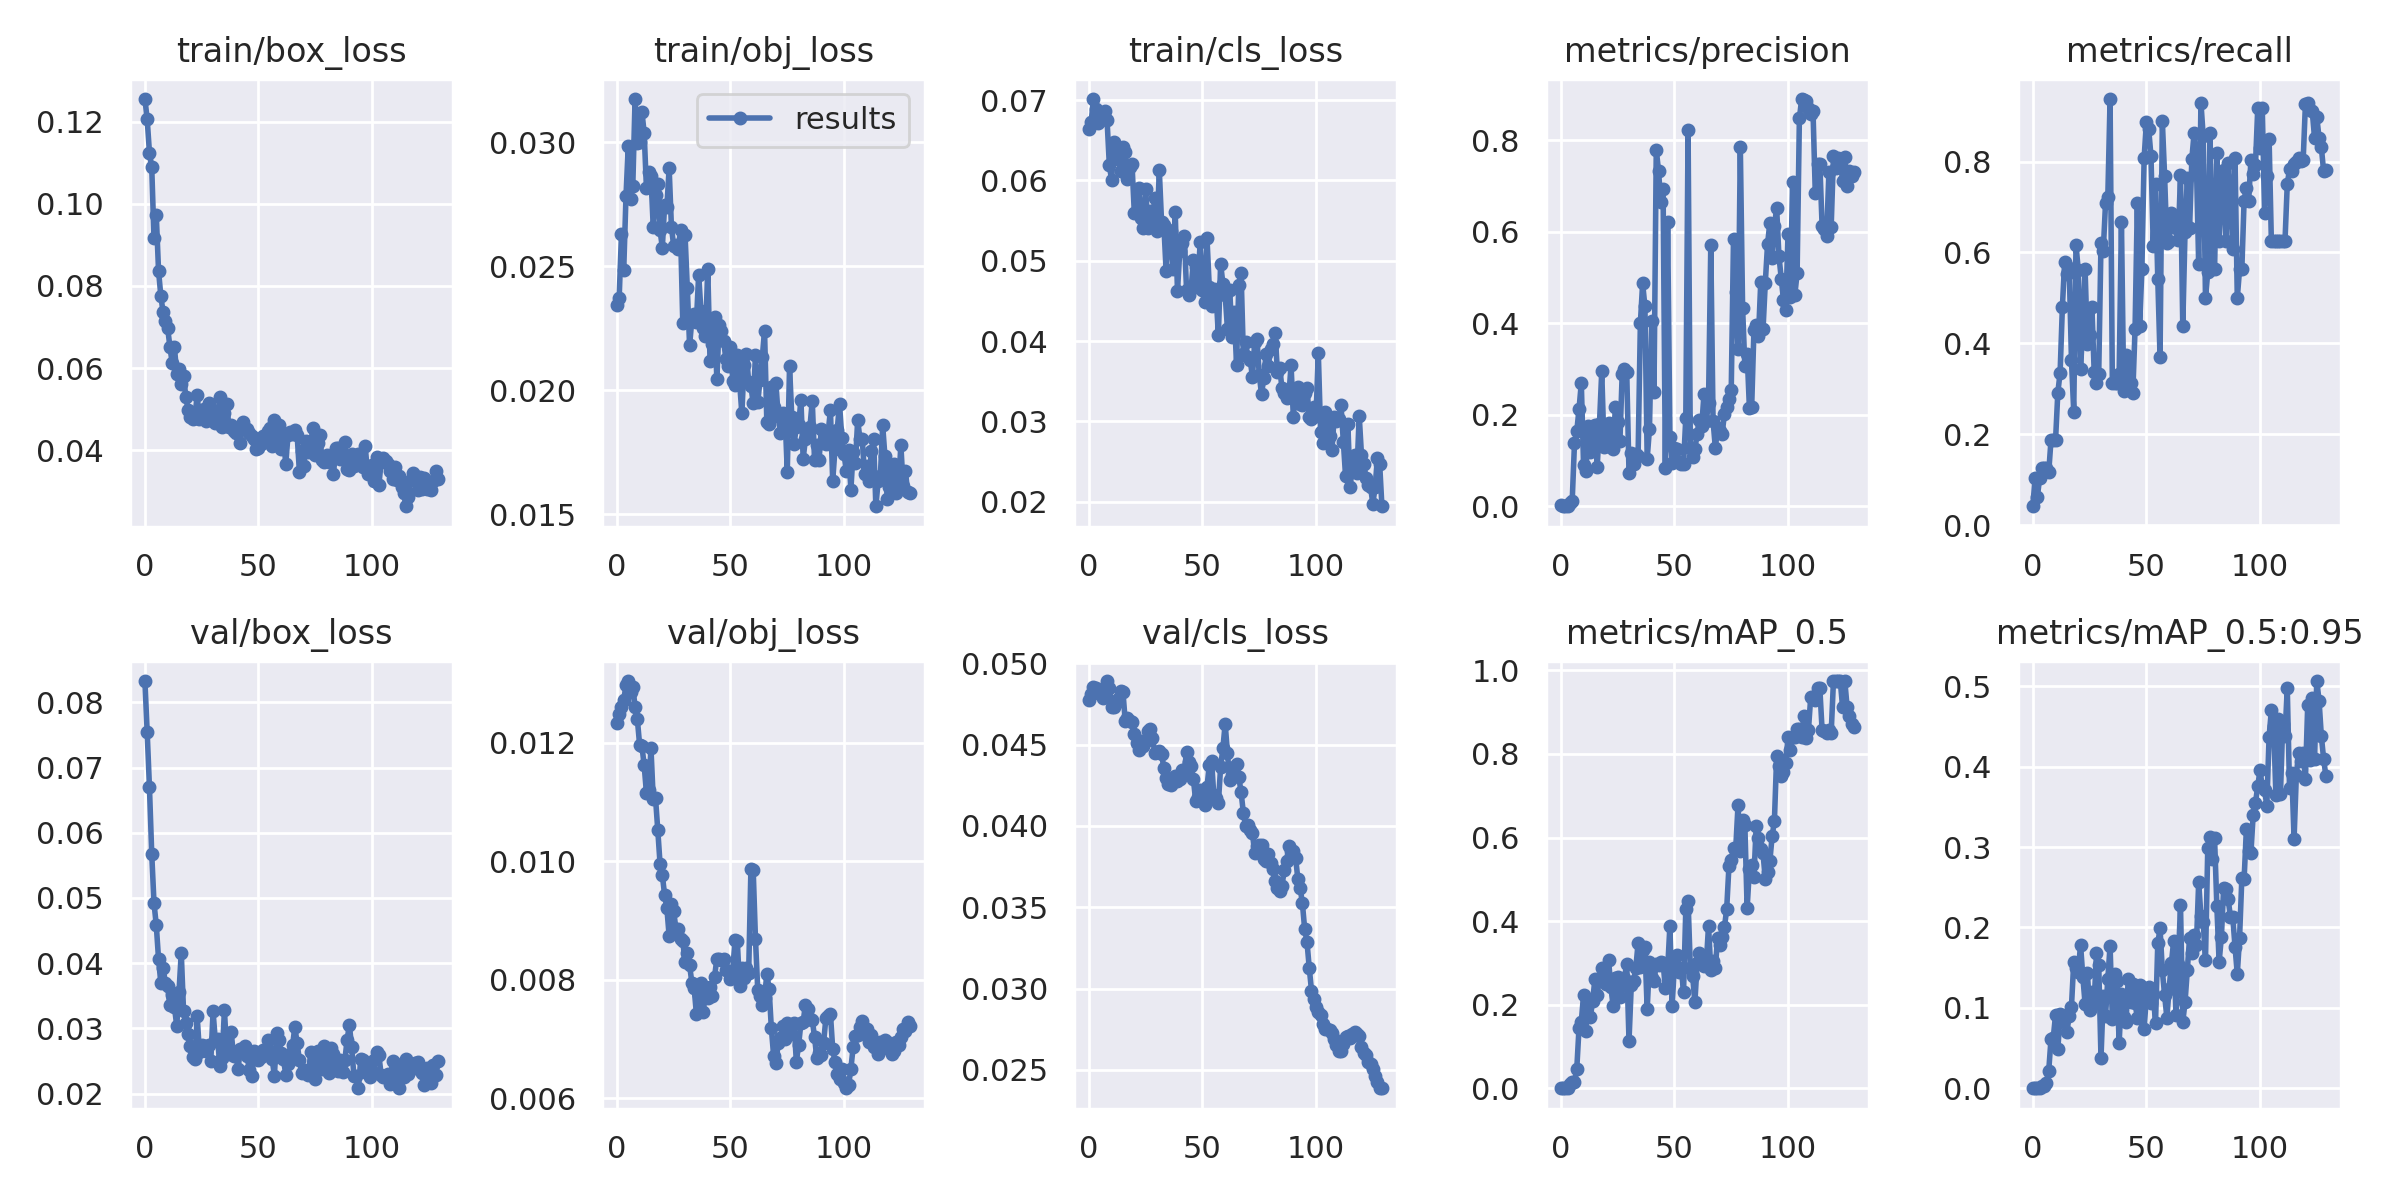

In [6]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason... 
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/exp2/results.png', width=1000)  # view results.png


In [7]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp2/weights/best.pt'], source=/content/yolov5/package5im-1/test/images, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-152-g26f0415 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7042489 parameters, 0 gradients, 15.9 GFLOPs
image 1/6 /content/yolov5/package5im-1/test/images/Alpro-Fresh-Soy-Milk--2-_jpg.rf.8fba2dea764f074a5b483ad23cdead88.jpg: 416x416 1 Alpro-Fresh-Soy-Milk, 1 Valio-Vanilla-Yoghurt, Done. (0.029s)
image 2/6 /content/yolov5/package5im-1/test/images/Arla-Medium-Fat-Milk--3-_jpg.rf.8d6c561d9b79beba80153eaac18f830f.jpg: 416x416 1 Arla-Medium-Fat-Milk, Done. (0.029s)
image 3/6 /cont

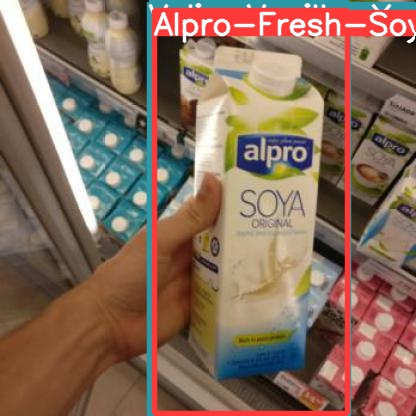

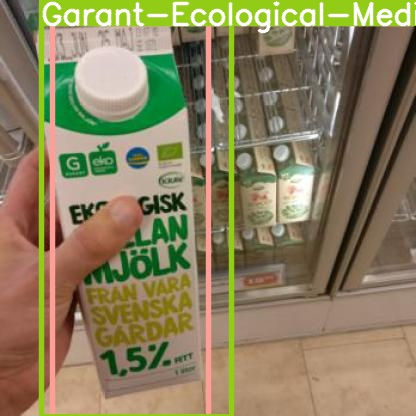

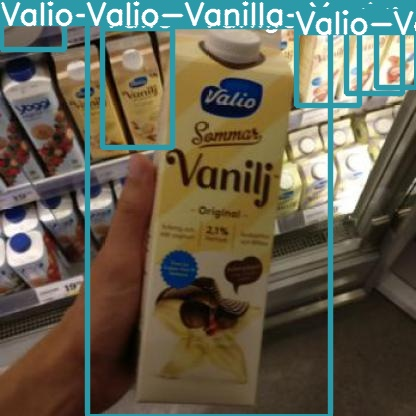

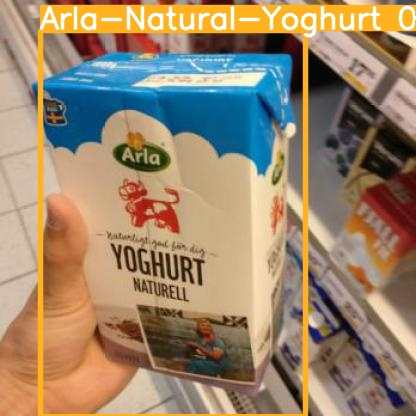

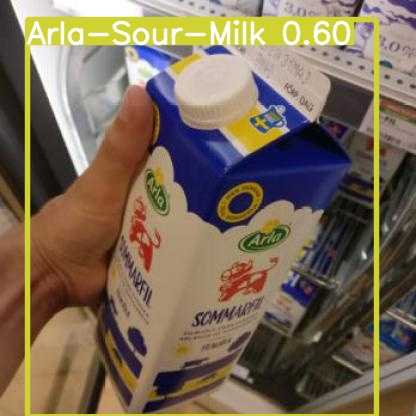

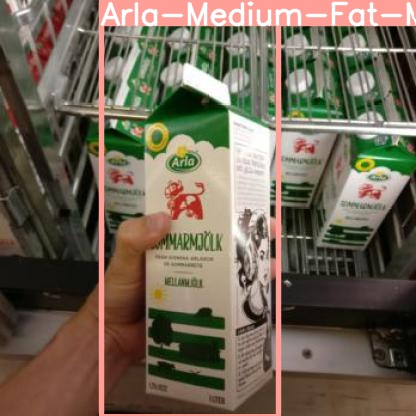

In [8]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")